### UNDERSTANDING SEQUENCE PROCESSING WITH CONVNETS
![title](./pics/convnets.png)

In [ ]:
#imports

#keras imports
from keras.models import Sequential, Model
from keras.layers import Embedding, SimpleRNN, Flatten, Input, Dense
from keras import layers
from keras.layers import LSTM
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.optimizers import RMSprop


# general imports
from IPython.display import display, Markdown #just to display markdown
import numpy as np
import cv2

# utility functions
import os
import sys
%matplotlib inline
os.path.dirname(os.path.abspath("__file__"))
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("__file__"))))
from utility.utils import utils
utility_obj = utils()

### Preparing data for model training

In [ ]:
# pre-processing initializations
max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

# data pre-prcessing
### IMDB data encoding from text will be extensively covered in "text_pre-processing_basic_model_building"###


print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

# cutting sentences to max length of 500
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

print ("after data preprocessing")
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape, "\n")

print("\nImdb review 1 sample input data\n")
print(input_train[:1]) 

print("\nImdb review data lables")
print(y_train[:2])
print(
"""
Note:  
0 : "Negative review"
1 : "Positive review"
post_padding in input data helps gragient in LSTM flow better 

"""
)

Loading data...
after data preprocessing
input_train shape: (25000, 500)
input_test shape: (25000, 500) 


Imdb review 1 sample input data

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0  

### training and evaluating a simple 1D convnet

starting model training...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, None, 128)         1280000   
_________________________________________________________________
conv1d_11 (Conv1D)           (None, None, 32)          28704     
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, None, 32)          0         
_________________________________________________________________
conv1d_12 (Conv1D)           (None, None, 32)          7200      
_________________________________________________________________
global_max_pooling1d_5 (Glob (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
_______________________________________

### result

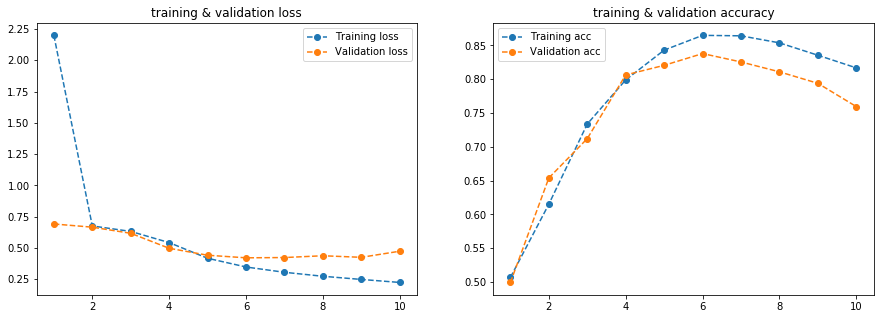

In [19]:
# model architecture and training
print("starting model training...")

model = Sequential()
model.add(layers.Embedding(max_features, 128))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))
model.summary()
print ("\n")

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

### result

In [ ]:
# ploting model training results
utility_obj.plot_training_history(history.history)

### COMBINING CNNs & RNNs FOR LONG SEQUENCES"
![title](./pics/combined_model.png)

### training 1D convnet with GRU

starting model training...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, None, 128)         1280000   
_________________________________________________________________
conv1d_15 (Conv1D)           (None, None, 32)          28704     
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, None, 32)          0         
_________________________________________________________________
conv1d_16 (Conv1D)           (None, None, 32)          7200      
_________________________________________________________________
gru_3 (GRU)                  (None, 32)                6240      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 1,322,177
Trainable params: 1,322,177
Non-trainable params: 0
_______________________________________

### result

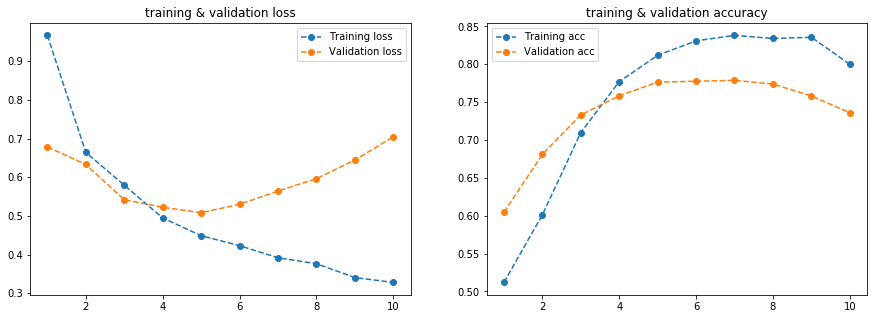

In [21]:
# model architecture and training
print("starting model training...")

model = Sequential()
model.add(layers.Embedding(max_features, 128))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GRU(32, dropout=0.1, recurrent_dropout=0.5))
model.add(layers.Dense(1))
model.summary()
print ("\n")

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

### result

In [ ]:
# ploting model training results
utility_obj.plot_training_history(history.history)

### UNDERSTANDING SEQUENCE PROCESSING WITH CONVNETS
![title](./pics/convnets.png)

### training and evaluating a simple 1D convnet

starting model training...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, None, 128)         1280000   
_________________________________________________________________
conv1d_11 (Conv1D)           (None, None, 32)          28704     
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, None, 32)          0         
_________________________________________________________________
conv1d_12 (Conv1D)           (None, None, 32)          7200      
_________________________________________________________________
global_max_pooling1d_5 (Glob (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
_______________________________________

### result

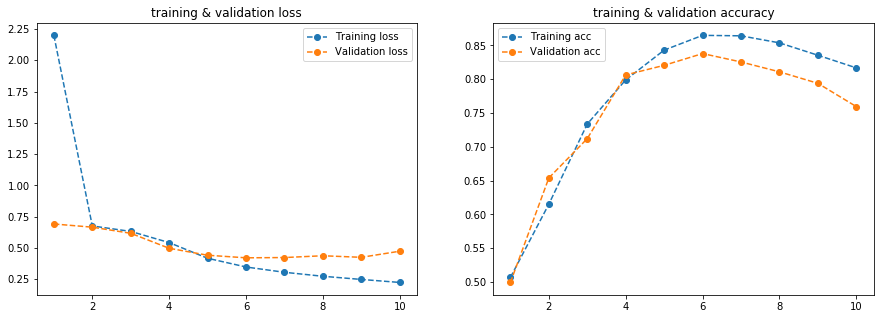

In [19]:
# model architecture and training
print("starting model training...")

model = Sequential()
model.add(layers.Embedding(max_features, 128))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))
model.summary()
print ("\n")

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

### result

In [ ]:
# ploting model training results
utility_obj.plot_training_history(history.history)

### COMBINING CNNs & RNNs FOR LONG SEQUENCES"
![title](./pics/combined_model.png)

### training 1D convnet with GRU

starting model training...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, None, 128)         1280000   
_________________________________________________________________
conv1d_15 (Conv1D)           (None, None, 32)          28704     
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, None, 32)          0         
_________________________________________________________________
conv1d_16 (Conv1D)           (None, None, 32)          7200      
_________________________________________________________________
gru_3 (GRU)                  (None, 32)                6240      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 1,322,177
Trainable params: 1,322,177
Non-trainable params: 0
_______________________________________

### result

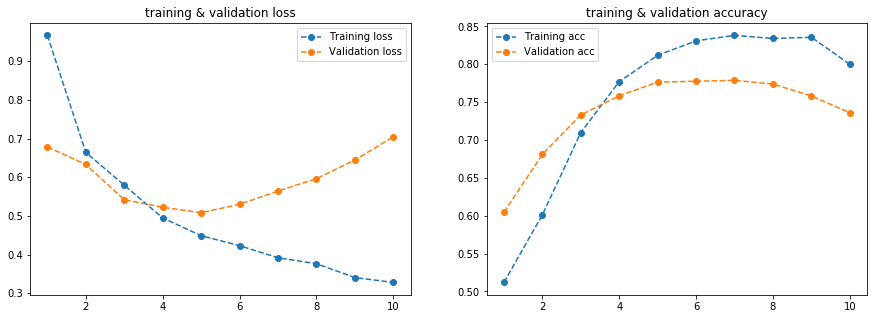

In [21]:
# model architecture and training
print("starting model training...")

model = Sequential()
model.add(layers.Embedding(max_features, 128))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GRU(32, dropout=0.1, recurrent_dropout=0.5))
model.add(layers.Dense(1))
model.summary()
print ("\n")

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

### result

In [ ]:
# ploting model training results
utility_obj.plot_training_history(history.history)